
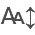

In [100]:
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import pandas as pd
import numpy as np

from scipy.stats import pearsonr 


# import urllib.request
import fastobo

import json

import goatools
from goatools.obo_parser import GODag

import itables.options as opt
from itables import init_notebook_mode, show
from itables.downsample import as_nbytes, nbytes
from itables.sample_dfs import get_indicators

init_notebook_mode(all_interactive=True)
opt.maxBytes = "128KB"

import seaborn as sns

sns.set()
plt.style.use('default')
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, BoundaryNorm


In [2]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.titlesize'] = 20

## Abro datos:

### **Datos de proteinas en Yeast**

Columns are:

1. **DB** - database contributing the file (always "SGD" for this file)

2. **DB_Object_ID** - SGDID
3. **DB_Object_Symbol** - When a Standard Gene Name (e.g. CDC28, COX2) has been conferred, it will be present in Column 3. When no Gene Name has been conferred, the Systematic Name (e.g. YAL001C, YGR116W, YAL034W-A) will be present in column 3.

4. **NOT** (optional) - 'NOT', 'contributes_to', or 'colocalizes_with' qualifier for a GO annotation, when needed
5. **GO ID** - unique numeric identifier for the GO term
6. **DB:Reference(|DB:Reference)** - the reference associated with the GO annotation
7. **Evidence** - the evidence code for the GO annotation
8. **With (or) From** (optional) - any With or From qualifier for the GO annotation
9. **Aspect** - which ontology the GO term belongs in
10. **DB_Object_Name(|Name)** (optional) - a name for the gene product in words, e.g. 'acid phosphatase'
11. **DB_Object_Synonym(|Synonym)** (optional) - The Systematic Name (e.g. YAL001C, YGR116W, YAL034W-A, Q0010) will be the first name present in Column 11. Any other names (except the Standard Name, which will be in Column 3 if	one exists), including Aliases used for the gene will also be present in this column.

12. **DB_Object_Type** - type of object annotated, e.g. gene, protein, etc.
13. **taxon(|taxon)** - taxonomic identifier of species encoding gene product
14. **Date** - date GO annotation was made
15. **Assigned_by** - source of the annotation (e.g. SGD, UniProtKB, YeastFunc, bioPIXIE_MEFIT)

In [3]:
gaf_df = pd.read_csv('../../Datos/gene_association.sgd.20241028.gaf', sep='\t', comment='!', header=None, low_memory=False)
short_headers = ["DB", "SGDID", "Symbol", "Qualifier", "GO_ID", "Reference", "Evidence", 
	"With_From", "Aspect", "Name", "Synonym", "Type", "Taxon", "Date", "Assigned_by1", "Assigned_by2", "Assigned_by3"]

gaf_df.columns = short_headers
gaf_df

DB       SGDID   Symbol                   Qualifier       GO_ID  \
0       SGD  S000003381     GPC1  acts_upstream_of_or_within  GO:0090640   
1       SGD  S000005701     ALE1  acts_upstream_of_or_within  GO:0090640   
2       SGD  S000003381     GPC1  acts_upstream_of_or_within  GO:0036151   
3       SGD  S000004492     RCF1  acts_upstream_of_or_within  GO:0033617   
4       SGD  S000004977    SIW14                     enables  GO:0052845   
...     ...         ...      ...                         ...         ...   
206943  SGD  S000006502    SNR42                  located_in  GO:0005730   
206944  SGD  S000007313    SNR79                  located_in  GO:0005730   
206945  SGD  S000007300    SNR36                  located_in  GO:0005730   
206946  SGD  S000006484  RDN25-1                  located_in  GO:0005840   
206947  SGD  S000006485  RDN25-2                  located_in  GO:0005840   

            Reference Evidence       With_From Aspect  \
0       PMID:30514764      IGI  SGD:S000005701      P   
1       PMID:30514764      IGI  SGD:S000003381      P   
2       PMID:30514764      IMP             NaN      P   
3       PMID:29746825      IMP             NaN      P   
4       PMID:26828065      IDA             NaN      F   
...               ...      ...             ...    ...   
206943  PMID:30502926      IEA    Rfam:RF01265      C   
206944  PMID:30502926      IEA    Rfam:RF01184      C   
206945  PMID:30502926      IEA    Rfam:RF01242      C   
206946  PMID:30502926      IEA    Rfam:RF02543      C   
206947  PMID:30502926      IEA    Rfam:RF02543      C   

                                                     Name  \
0           Glycerophosphocholine acyltransferase (GPCAT)   
1       Broad-specificity lysophospholipid acyltransfe...   
2           Glycerophosphocholine acyltransferase (GPCAT)   
3                            Cytochrome c oxidase subunit   
4       Inositol phosphatase involved in inositol pyro...   
...                                                   ...   
206943             H/ACA box small nucleolar RNA (snoRNA)   
206944               C/D box small nucleolar RNA (snoRNA)   
206945             H/ACA box small nucleolar RNA (snoRNA)   
206946                       25S ribosomal RNA (25S rRNA)   
206947                       25S ribosomal RNA (25S rRNA)   

                                                  Synonym     Type  \
0           YGR149W|glycerophosphocholine acyltransferase  protein   
1       YOR175C|SLC4|LPT1|LCA1|lysophospholipid acyltr...  protein   
2           YGR149W|glycerophosphocholine acyltransferase  protein   
3                                           YML030W|AIM31  protein   
4       YNL032W|OCA3|putative tyrosine protein phospha...  protein   
...                                                   ...      ...   
206943                                    YNCK0020C|snR42   snoRNA   
206944                                 YNCL0005C|Z9|snR79   snoRNA   
206945                                    YNCO0022C|snR36   snoRNA   
206946         YNCL0012C|25S ribosomal RNA|26S rRNA|RDN25     rRNA   
206947         YNCL0021C|25S ribosomal RNA|26S rRNA|RDN25     rRNA   

               Taxon      Date Assigned_by1         Assigned_by2  \
0       taxon:559292  20181220          SGD                  NaN   
1       taxon:559292  20181220          SGD                  NaN   
2       taxon:559292  20181220          SGD                  NaN   
3       taxon:559292  20181212          SGD                  NaN   
4       taxon:559292  20190110          SGD  part_of(GO:0071543)   
...              ...       ...          ...                  ...   
206943  taxon:559292  20241014   RNAcentral                  NaN   
206944  taxon:559292  20241014   RNAcentral                  NaN   
206945  taxon:559292  20241014   RNAcentral                  NaN   
206946  taxon:559292  20241014   RNAcentral                  NaN   
206947  taxon:559292  20241014   RNAcentral                  NaN   

            Assigned

In [4]:
# Tomo solo las columnas que me interesan:

df_proteinas = gaf_df[["SGDID", "Qualifier", "GO_ID", "With_From", "Synonym", "Type",  "Date"]].copy()
df_proteinas['Date'] = pd.to_datetime(df_proteinas['Date'], format='%Y%m%d')
df_proteinas

SGDID                   Qualifier       GO_ID       With_From  \
0       S000003381  acts_upstream_of_or_within  GO:0090640  SGD:S000005701   
1       S000005701  acts_upstream_of_or_within  GO:0090640  SGD:S000003381   
2       S000003381  acts_upstream_of_or_within  GO:0036151             NaN   
3       S000004492  acts_upstream_of_or_within  GO:0033617             NaN   
4       S000004977                     enables  GO:0052845             NaN   
...            ...                         ...         ...             ...   
206943  S000006502                  located_in  GO:0005730    Rfam:RF01265   
206944  S000007313                  located_in  GO:0005730    Rfam:RF01184   
206945  S000007300                  located_in  GO:0005730    Rfam:RF01242   
206946  S000006484                  located_in  GO:0005840    Rfam:RF02543   
206947  S000006485                  located_in  GO:0005840    Rfam:RF02543   

                                                  Synonym     Type       Date  
0           YGR149W|glycerophosphocholine acyltransferase  protein 2018-12-20  
1       YOR175C|SLC4|LPT1|LCA1|lysophospholipid acyltr...  protein 2018-12-20  
2           YGR149W|glycerophosphocholine acyltransferase  protein 2018-12-20  
3                                           YML030W|AIM31  protein 2018-12-12  
4       YNL032W|OCA3|putative tyrosine protein phospha...  protein 2019-01-10  
...                                                   ...      ...        ...  
206943                                    YNCK0020C|snR42   snoRNA 2024-10-14  
206944                                 YNCL0005C|Z9|snR79   snoRNA 2024-10-14  
206945                                    YNCO0022C|snR36   snoRNA 2024-10-14  
206946         YNCL0012C|25S ribosomal RNA|26S rRNA|RDN25     rRNA 2024-10-14  
206947         YNCL0021C|25S ribosomal RNA|26S rRNA|RDN25     rRNA 2024-10-14  

[206948 rows x 7 columns]

In [5]:
nombre_sistematico1 = df_proteinas['Synonym'].str.split('|').str[0]

# nombre_sistematico2 = df_proteinas['Synonym'].str.split('|').str[1]
df_proteinas['Nombre'] = nombre_sistematico1
# df_proteinas['Nombre2'] = nombre_sistematico2
df_proteinas['Index'] = df_proteinas.index

df_proteinas = df_proteinas[['Nombre', 'Date', 'SGDID', 'GO_ID', 'Qualifier', 'With_From', 'Synonym', 'Type' ]]
df_proteinas

Nombre       Date       SGDID       GO_ID  \
0         YGR149W 2018-12-20  S000003381  GO:0090640   
1         YOR175C 2018-12-20  S000005701  GO:0090640   
2         YGR149W 2018-12-20  S000003381  GO:0036151   
3         YML030W 2018-12-12  S000004492  GO:0033617   
4         YNL032W 2019-01-10  S000004977  GO:0052845   
...           ...        ...         ...         ...   
206943  YNCK0020C 2024-10-14  S000006502  GO:0005730   
206944  YNCL0005C 2024-10-14  S000007313  GO:0005730   
206945  YNCO0022C 2024-10-14  S000007300  GO:0005730   
206946  YNCL0012C 2024-10-14  S000006484  GO:0005840   
206947  YNCL0021C 2024-10-14  S000006485  GO:0005840   

                         Qualifier       With_From  \
0       acts_upstream_of_or_within  SGD:S000005701   
1       acts_upstream_of_or_within  SGD:S000003381   
2       acts_upstream_of_or_within             NaN   
3       acts_upstream_of_or_within             NaN   
4                          enables             NaN   
...                            ...             ...   
206943                  located_in    Rfam:RF01265   
206944                  located_in    Rfam:RF01184   
206945                  located_in    Rfam:RF01242   
206946                  located_in    Rfam:RF02543   
206947                  located_in    Rfam:RF02543   

                                                  Synonym     Type  
0           YGR149W|glycerophosphocholine acyltransferase  protein  
1       YOR175C|SLC4|LPT1|LCA1|lysophospholipid acyltr...  protein  
2           YGR149W|glycerophosphocholine acyltransferase  protein  
3                                           YML030W|AIM31  protein  
4       YNL032W|OCA3|putative tyrosine protein phospha...  protein  
...                                                   ...      ...  
206943                                    YNCK0020C|snR42   snoRNA  
206944                                 YNCL0005C|Z9|snR79   snoRNA  
206945                                    YNCO0022C|snR36   snoRNA  
206946         YNCL0012C|25S ribosomal RNA|26S rRNA|RDN25     rRNA  
206947         YNCL0021C|25S ribosomal RNA|26S rRNA|RDN25     rRNA  

[206948 rows x 8 columns]

## Arranco con los datos de transcriptomas

In [17]:
ruta_transc = '../../Datos/transcriptomas/breeden.tsv'
tran_df = pd.read_csv(ruta_transc, sep='\t')

tran_df['Proteina'] = tran_df.index
tran_df = tran_df.reset_index(drop=True)
tran_df = tran_df[['Proteina'] + [col for col in tran_df.columns if col != 'Proteina']]
tran_df

Proteina  GSM112133  GSM112134  GSM112135  GSM112136  GSM112137  \
0     YAL001C  -0.172199  -0.176692  -0.128590  -0.220821  -0.051547   
1     YAL002W  -0.246357  -0.164149  -0.212927  -0.287199  -0.143381   
2     YAL003W   0.091947   0.081549   0.070837   0.063376   0.044508   
3     YAL004W   0.791379   0.213645   0.303273   0.128341   0.017595   
4     YAL005C  -0.002195   0.192435   0.138695   0.033640  -0.011954   
...       ...        ...        ...        ...        ...        ...   
6212  YPR199C  -0.023336   0.009671  -0.038067  -0.003810   0.012602   
6213  YPR200C   0.109581   0.049337  -0.012592   0.052212  -0.069209   
6214  YPR201W   0.044884  -0.010985   0.076546  -0.081759   0.059699   
6215  YPR202W   0.246845   0.152977   0.176680  -0.074923   0.002672   
6216  YPR203W   0.336540   0.191422   0.169921  -0.087259  -0.067951   

      GSM112138  GSM112139  GSM112140  GSM112141  ...  GSM112148  GSM112149  \
0     -0.121769  -0.134030  -0.005316  -0.042889  ...  -0.029420  -0.097445   
1     -0.148758  -0.234190  -0.105236  -0.094954  ...  -0.086529  -0.099139   
2     -0.008903  -0.010576  -0.020787  -0.037553  ...   0.026706   0.046424   
3     -0.038509  -0.070606  -0.063356  -0.064029  ...   0.061475   0.118078   
4     -0.102369  -0.123758  -0.152752  -0.091007  ...   0.118397   0.125501   
...         ...        ...        ...        ...  ...        ...        ...   
6212   0.016154   0.029920  -0.002402   0.039312  ...   0.026678   0.028606   
6213   0.166598   0.106580   0.298768  -0.041508  ...  -0.002554   0.055049   
6214  -0.043355  -0.064022   0.111268   0.006343  ...   0.021677   0.092892   
6215  -0.088445   0.065064   0.094173   0.149909  ...  -0.168845  -0.012658   
6216  -0.092187   0.067291  -0.049843   0.173110  ...  -0.142014  -0.058622   

      GSM112150  GSM112151  GSM112152  GSM112153  GSM112154  GSM112155  \
0     -0.022485  -0.036959  -0.043474  -0.088562   0.030042   0.052682   
1     -0.086668  -0.040772  -0.035629  -0.094914   0.235969   0.044702   
2     -0.031852  -0.003595   0.021282   0.003498   0.053277   0.017594   
3      0.077254   0.079558  -0.008287   0.284459   0.684856   0.285945   
4      0.043705   0.064237   0.038632  -0.011199   0.207420  -0.033099   
...         ...        ...        ...        ...        ...        ...   
6212   0.022775  -0.010057   0.006367  -0.011513  -0.001685  -0.005437   
6213  -0.325484  -0.188810  -0.102827  -0.273137  -0.479281  -0.088183   
6214   0.040280   0.116258   0.081372   0.050018  -0.147542   0.160008   
6215   0.010743   0.160122   0.125782   0.257704   0.063183   0.191903   
6216  -0.010367   0.202011   0.111020   0.283047   0.224540   0.163265   

      GSM112156  GSM112157  
0      0.030987  -0.089989  
1      0.048027  -0.056970  
2     -0.006687  -0.019525  
3      0.436625   0.171254  
4      0.023944   0.012735  
...         ...        ...  
6212  -0.071166  -0.043906  
6213  -0.086212  -0.164707  
6214   0.221775   0.031906  
6215   0.260021   0.172612  
6216   0.322730   0.208752  

[6217 rows x 26 columns]

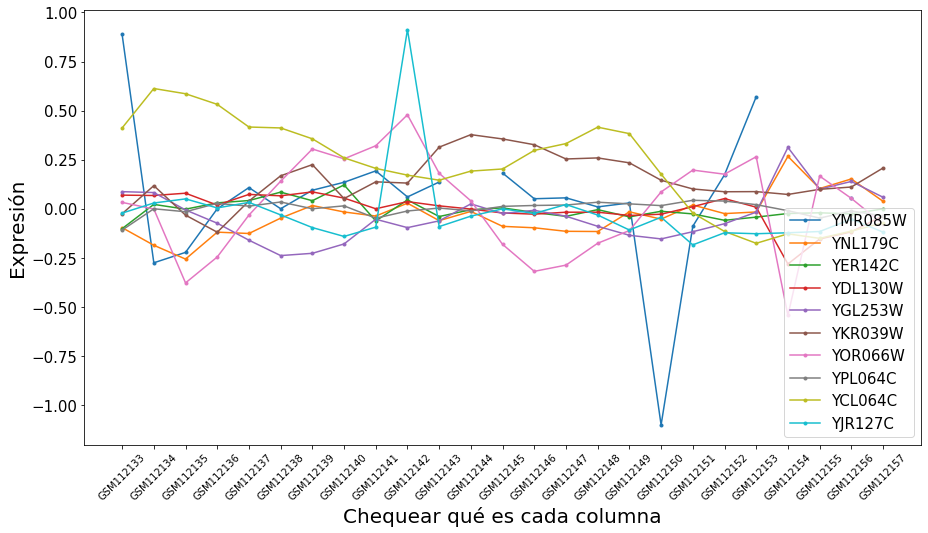

In [ ]:
filas = np.random.randint(0, tran_df.shape[0], 10, dtype=int)

for i in filas:
	plt.plot(tran_df.iloc[i][1:], '.-', label = tran_df.iloc[i]['Proteina'])
	plt.legend()
	plt.xticks(rotation=45, fontsize = 10)
	plt.ylabel('Expresión')
	plt.xlabel('Chequear qué es cada columna')
	plt.title('Expresión de proteínas tomadas aleatoriamente')

In [ ]:
# voy a crear una matriz que tenga indices y columnas con los nombres de las proteinas y cada elemento ij de la matriz sea el coeficiente de pearonr entre las expresiones de las proteinas i y j

# Prueba con 10 datos
n = 10
tran_df_short = tran_df.iloc[n:n+10]
tran_df_short
tamaño = tran_df_short.shape[0]

matriz_pearson = np.zeros((tamaño, tamaño))
matriz_df = pd.DataFrame(matriz_pearson, columns = tran_df_short['Proteina'], index = tran_df_short['Proteina'])
matriz_df

for i in range(tamaño):
	for j in range(tamaño):
		x = tran_df_short.iloc[i][1:]
		y = tran_df_short.iloc[j][1:]

		has_nan_x = pd.isnull(x).any()
		has_nan_y = pd.isnull(y).any()

		if has_nan_x:
			nan_indices = x[pd.isnull(x)].index  # Devuelve las etiquetas de columna
			# print(f"Array x contains #NaNs:", len(nan_indices))
		elif has_nan_y:
			nan_indices = y[pd.isnull(y)].index
			# print(f"Array y contains #NaNs:", len(nan_indices))
		elif has_nan_x and has_nan_y:
			nan_indices = x[pd.isnull(x)].index | y[pd.isnull(y)].index
			# print(f"Arrays x and y contains #NaNs:", len(nan_indices))
				
		# Elimina los valores en las posiciones correspondientes en x e y
		yy = y.drop(nan_indices)
		xx = x.drop(nan_indices)

		pearson = pearsonr(xx,yy)[0]

		matriz_pearson[i, j] = pearson
		matriz_df.iloc[i, j] = matriz_pearson[i, j]

matriz_df


Proteina   YAL012W   YAL013W   YAL014C   YAL015C   YAL016W   YAL017W  \
Proteina                                                               
YAL012W   1.000000  0.071945 -0.295680  0.211866  0.287465  0.111812   
YAL013W   0.071945  1.000000  0.368432 -0.224617 -0.424167 -0.163686   
YAL014C  -0.295680  0.368432  1.000000  0.251303  0.245875 -0.254076   
YAL015C   0.211866 -0.224617  0.251303  1.000000  0.779489 -0.234326   
YAL016W   0.287465 -0.424167  0.245875  0.779489  1.000000 -0.255338   
YAL017W   0.111812 -0.163686 -0.254076 -0.234326 -0.255338  1.000000   
YAL018C  -0.196980 -0.078617 -0.266298 -0.347343 -0.228529  0.118267   
YAL019W  -0.013967 -0.448366 -0.169023 -0.171089  0.048576  0.567167   
YAL020C   0.403407  0.258410 -0.545698 -0.114581 -0.369684 -0.061048   
YAL021C  -0.192002  0.362743  0.383194 -0.397733 -0.325673  0.336561   

Proteina   YAL018C   YAL019W   YAL020C   YAL021C  
Proteina                                          
YAL012W  -0.196980 -0.013967  0.403407 -0.192002  
YAL013W  -0.078617 -0.448366  0.258410  0.362743  
YAL014C  -0.266298 -0.169023 -0.545698  0.383194  
YAL015C  -0.347343 -0.171089 -0.114581 -0.397733  
YAL016W  -0.228529  0.048576 -0.369684 -0.325673  
YAL017W   0.118267  0.567167 -0.061048  0.336561  
YAL018C   1.000000 -0.023176 -0.013590  0.038458  
YAL019W  -0.023176  1.000000 -0.216066  0.357198  
YAL020C  -0.013590 -0.216066  1.000000 -0.371532  
YAL021C   0.038458  0.357198 -0.371532  1.000000

In [ ]:
def generar_matriz_pearson(df):
	tamaño = df.shape[0]
	matriz_pearson = np.zeros((tamaño, tamaño))
	matriz_df = pd.DataFrame(matriz_pearson, columns = df['Proteina'], index = df['Proteina'])
	matriz_df

	for i in range(tamaño):
		for j in range(tamaño):
			if i <= j:

				x = df.iloc[i][1:]
				y = df.iloc[j][1:]

				has_nan_x = pd.isnull(x).any()
				has_nan_y = pd.isnull(y).any()

				if has_nan_x or has_nan_y:
					nan_indices = x[pd.isnull(x)].index.union(y[pd.isnull(y)].index)
					yy = y.drop(nan_indices)
					xx = x.drop(nan_indices)
					# print(xx,yy)
					pearson = pearsonr(xx,yy)[0]
					# print(f"Arrays x and y contains #NaNs:", len(nan_indices))
				else:
					pearson = pearsonr(x,y)[0]

				matriz_df.iloc[i, j] = pearson

	return matriz_df

In [172]:
from joblib import Parallel, delayed

In [173]:
def calcular_pearson(df, i, j):
    x = df.iloc[i][1:]
    y = df.iloc[j][1:]

    has_nan_x = pd.isnull(x).any()
    has_nan_y = pd.isnull(y).any()

    if has_nan_x or has_nan_y:
        nan_indices = x[pd.isnull(x)].index.union(y[pd.isnull(y)].index)
        yy = y.drop(nan_indices)
        xx = x.drop(nan_indices)
        return pearsonr(xx, yy)[0]
    else:
        return pearsonr(x, y)[0]


In [177]:
def generar_matriz_pearson_paralelizada(df, n_jobs=-1):
    tamaño = df.shape[0]
    matriz_pearson = np.zeros((tamaño, tamaño))
    matriz_df = pd.DataFrame(matriz_pearson, columns=df['Proteina'], index=df['Proteina'])

    # Generar todas las combinaciones (i, j) para i <= j
    indices = [(i, j) for i in range(tamaño) for j in range(i, tamaño)]

    # Paralelizar el cálculo usando joblib
    resultados = Parallel(n_jobs=n_jobs, backend="loky")(
        delayed(calcular_pearson)(df, i, j) for i, j in indices
    )

    # Asignar los resultados a la matriz
    for (i, j), pearson in zip(indices, resultados):
        matriz_df.iloc[i, j] = pearson
        matriz_df.iloc[j, i] = pearson  # Llenar la matriz simétrica

    return matriz_df

In [183]:
tran_df.shape

(6217, 26)

In [ ]:
# n = 11
# tran_df_prueba = tran_df.iloc[n:n+50]

# matriz_df = generar_matriz_pearson(tran_df_prueba)
matriz_df = generar_matriz_pearson_paralelizada(tran_df,  n_jobs=4) # 2 horas con 4 nucleos
matriz_df

Proteina   YAL001C   YAL002W   YAL003W   YAL004W   YAL005C   YAL007C  \
Proteina                                                               
YAL001C   1.000000  0.784409 -0.255929 -0.000721  0.124635 -0.135642   
YAL002W   0.784409  1.000000 -0.123425  0.319548  0.328560 -0.291349   
YAL003W  -0.255929 -0.123425  1.000000  0.547065  0.622235  0.410656   
YAL004W  -0.000721  0.319548  0.547065  1.000000  0.421385  0.195020   
YAL005C   0.124635  0.328560  0.622235  0.421385  1.000000  0.490343   
...            ...       ...       ...       ...       ...       ...   
YPR199C  -0.057262 -0.187421 -0.266689 -0.556235 -0.192349 -0.175384   
YPR200C  -0.237002 -0.604758  0.030231 -0.384033 -0.362241  0.328341   
YPR201W   0.371669  0.149767 -0.170058  0.010244 -0.150002  0.061394   
YPR202W   0.053529  0.125068 -0.161563  0.374832 -0.149757  0.131102   
YPR203W   0.024929  0.234124 -0.110182  0.544893  0.049754  0.201957   

Proteina   YAL008W   YAL009W   YAL010C   YAL011W  ...   YPR194C   YPR195C  \
Proteina                                          ...                       
YAL001C   0.068274 -0.208016 -0.299033  0.302697  ...  0.110906  0.192338   
YAL002W  -0.001941 -0.428036 -0.446571  0.461013  ... -0.267790  0.156363   
YAL003W   0.247240 -0.175059 -0.003965  0.073686  ... -0.376035  0.005696   
YAL004W   0.078229 -0.540098 -0.166937  0.130986  ... -0.343021  0.282223   
YAL005C   0.529234 -0.297900 -0.515094  0.285265  ... -0.578441 -0.027009   
...            ...       ...       ...       ...  ...       ...       ...   
YPR199C  -0.003728  0.566340 -0.124162  0.201184  ...  0.336640 -0.143068   
YPR200C  -0.148681  0.230210  0.359281 -0.338900  ...  0.527433 -0.019971   
YPR201W  -0.230815 -0.116290  0.056176 -0.414752  ... -0.120009  0.221863   
YPR202W  -0.196000 -0.243350 -0.109921 -0.252049  ... -0.088322  0.392508   
YPR203W  -0.127782 -0.314147 -0.222125 -0.109903  ... -0.127888  0.344333   

Proteina   YPR196W   YPR197C   YPR198W   YPR199C   YPR200C   YPR201W  \
Proteina                                                               
YAL001C   0.053657 -0.280936  0.393633 -0.057262 -0.237002  0.371669   
YAL002W   0.049744 -0.305974  0.368092 -0.187421 -0.604758  0.149767   
YAL003W  -0.300600  0.077396 -0.619781 -0.266689  0.030231 -0.170058   
YAL004W  -0.040569  0.437393 -0.452444 -0.556235 -0.384033  0.010244   
YAL005C   0.012542 -0.418005 -0.374103 -0.192349 -0.362241 -0.150002   
...            ...       ...       ...       ...       ...       ...   
YPR199C  -0.121944 -0.361614  0.361338  1.000000  0.189258 -0.381692   
YPR200C   0.091711  0.187729 -0.198345  0.189258  1.000000  0.094894   
YPR201W   0.003551  0.115338 -0.179094 -0.381692  0.094894  1.000000   
YPR202W   0.298609  0.243676 -0.246702 -0.351813 -0.145606  0.452052   
YPR203W   0.362602  0.260880 -0.256586 -0.363288 -0.278559  0.217796   

Proteina   YPR202W   YPR203W  
Proteina                      
YAL001C   0.053529  0.024929  
YAL002W   0.125068  0.234124  
YAL003W  -0.161563 -0.110182  
YAL004W   0.374832  0.544893  
YAL005C  -0.149757  0.049754  
...            ...       ...  
YPR199C  -0.351813 -0.363288  
YPR200C  -0.145606 -0.278559  
YPR201W   0.452052  0.217796  
YPR202W   1.000000  0.900580  
YPR203W   0.900580  1.000000  

[6217 rows x 6217 columns]

In [202]:
matriz_df.to_csv('matriz_pearson_breeden.csv', header=True, index=True) #1 minuto en guardar la matriz simetrica

In [201]:
# Explorar despues esta idea

# import cupy as cp

# def generar_matriz_pearson_gpu(df):
#     # Convertir el DataFrame a una matriz CuPy
#     proteinas = df['Proteina']
#     data = cp.array(df.iloc[:, 1:].to_numpy(dtype=cp.float32)) 
#     tamaño = data.shape[0]

#     matriz_pearson = cp.zeros((tamaño, tamaño), dtype=cp.float32)

#     # Calcular la correlación de Pearson en GPU
#     for i in range(tamaño):
#         for j in range(i, tamaño):
#             x = data[i]
#             y = data[j]

#             mask = ~cp.isnan(x) & ~cp.isnan(y)
#             x_valid = x[mask]
#             y_valid = y[mask]

#             if len(x_valid) > 1 and len(y_valid) > 1:
#                 pearson = cp.corrcoef(x_valid, y_valid)[0, 1]
#             else:
#                 pearson = cp.nan

#             matriz_pearson[i, j] = pearson
#             matriz_pearson[j, i] = pearson  

#     matriz_pearson = cp.asnumpy(matriz_pearson) 
#     matriz_df = pd.DataFrame(
#         matriz_pearson, columns=proteinas, index=proteinas
#     )
#     return matriz_df


## Trabajo con la matriz de correlación 

In [92]:
def plot_heatmap(df, cantidad = -1, figsize = (12,12), **kwargs):

    imagen = df.copy().to_numpy()
    if cantidad == -1:
        imagen2 = imagen
    else:
	    imagen2 = imagen[:cantidad, :cantidad]

    fig, ax = plt.subplots(figsize=figsize)

    # Pasar kwargs correctamente a imshow
    im = ax.imshow(imagen2, **kwargs)

    # Configurar el colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.1) 
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('Coeficiente de correlación')

    plt.show()


In [ ]:
matriz_pear = pd.read_csv('../../Datos/transcriptomas/Matrices_javi/matriz_pearson_breeden.csv')
matriz_pear = matriz_pear.set_index('Proteina')
matriz_pear.head()

YAL001C   YAL002W   YAL003W   YAL004W   YAL005C   YAL007C  \
Proteina                                                               
YAL001C   1.000000  0.784409 -0.255929 -0.000721  0.124635 -0.135642   
YAL002W   0.784409  1.000000 -0.123425  0.319548  0.328560 -0.291349   
YAL003W  -0.255929 -0.123425  1.000000  0.547065  0.622235  0.410656   
YAL004W  -0.000721  0.319548  0.547065  1.000000  0.421385  0.195020   
YAL005C   0.124635  0.328560  0.622235  0.421385  1.000000  0.490343   

           YAL008W   YAL009W   YAL010C   YAL011W  ...   YPR194C   YPR195C  \
Proteina                                          ...                       
YAL001C   0.068274 -0.208016 -0.299033  0.302697  ...  0.110906  0.192338   
YAL002W  -0.001941 -0.428036 -0.446571  0.461013  ... -0.267790  0.156363   
YAL003W   0.247240 -0.175059 -0.003965  0.073686  ... -0.376035  0.005696   
YAL004W   0.078229 -0.540098 -0.166937  0.130986  ... -0.343021  0.282223   
YAL005C   0.529234 -0.297900 -0.515094  0.285265  ... -0.578441 -0.027009   

           YPR196W   YPR197C   YPR198W   YPR199C   YPR200C   YPR201W  \
Proteina                                                               
YAL001C   0.053657 -0.280936  0.393633 -0.057262 -0.237002  0.371669   
YAL002W   0.049744 -0.305974  0.368092 -0.187421 -0.604758  0.149767   
YAL003W  -0.300600  0.077396 -0.619781 -0.266689  0.030231 -0.170058   
YAL004W  -0.040569  0.437393 -0.452444 -0.556235 -0.384033  0.010244   
YAL005C   0.012542 -0.418005 -0.374103 -0.192349 -0.362241 -0.150002   

           YPR202W   YPR203W  
Proteina                      
YAL001C   0.053529  0.024929  
YAL002W   0.125068  0.234124  
YAL003W  -0.161563 -0.110182  
YAL004W   0.374832  0.544893  
YAL005C  -0.149757  0.049754  

[5 rows x 6217 columns]

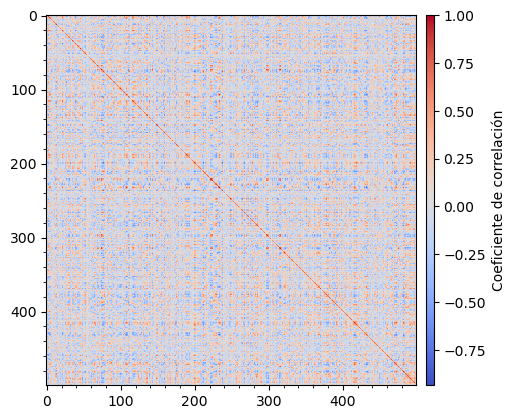

In [321]:
plot_heatmap(matriz_pear, cantidad=500, figsize = (5,5), cmap='coolwarm')

In [94]:
enlaces = matriz_pear.copy().to_numpy()

enlaces[np.tril_indices_from(enlaces, k=-1)] = 0
df = pd.DataFrame(enlaces, columns=matriz_pear.columns, index=matriz_pear.index)
df

YAL001C   YAL002W   YAL003W   YAL004W   YAL005C   YAL007C   YAL008W  \
Proteina                                                                        
YAL001C       1.0  0.784409 -0.255929 -0.000721  0.124635 -0.135642  0.068274   
YAL002W       0.0  1.000000 -0.123425  0.319548  0.328560 -0.291349 -0.001941   
YAL003W       0.0  0.000000  1.000000  0.547065  0.622235  0.410656  0.247240   
YAL004W       0.0  0.000000  0.000000  1.000000  0.421385  0.195020  0.078229   
YAL005C       0.0  0.000000  0.000000  0.000000  1.000000  0.490343  0.529234   
...           ...       ...       ...       ...       ...       ...       ...   
YPR199C       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
YPR200C       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
YPR201W       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
YPR202W       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
YPR203W       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           YAL009W   YAL010C   YAL011W  ...   YPR194C   YPR195C   YPR196W  \
Proteina                                ...                                 
YAL001C  -0.208016 -0.299033  0.302697  ...  0.110906  0.192338  0.053657   
YAL002W  -0.428036 -0.446571  0.461013  ... -0.267790  0.156363  0.049744   
YAL003W  -0.175059 -0.003965  0.073686  ... -0.376035  0.005696 -0.300600   
YAL004W  -0.540098 -0.166937  0.130986  ... -0.343021  0.282223 -0.040569   
YAL005C  -0.297900 -0.515094  0.285265  ... -0.578441 -0.027009  0.012542   
...            ...       ...       ...  ...       ...       ...       ...   
YPR199C   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
YPR200C   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
YPR201W   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
YPR202W   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
YPR203W   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

           YPR197C   YPR198W   YPR199C   YPR200C   YPR201W   YPR202W   YPR203W  
Proteina                                                                        
YAL001C  -0.280936  0.393633 -0.057262 -0.237002  0.371669  0.053529  0.024929  
YAL002W  -0.305974  0.368092 -0.187421 -0.604758  0.149767  0.125068  0.234124  
YAL003W   0.077396 -0.619781 -0.266689  0.030231 -0.170058 -0.161563 -0.110182  
YAL004W   0.437393 -0.452444 -0.556235 -0.384033  0.010244  0.374832  0.544893  
YAL005C  -0.418005 -0.374103 -0.192349 -0.362241 -0.150002 -0.149757  0.049754  
...            ...       ...       ...       ...       ...       ...       ...  
YPR199C   0.000000  0.000000  1.000000  0.189258 -0.381692 -0.351813 -0.363288  
YPR200C   0.000000  0.000000  0.000000  1.000000  0.094894 -0.145606 -0.278559  
YPR201W   0.000000  0.000000  0.000000  0.000000  1.000000  0.452052  0.217796  
YPR202W   0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  0.900580  
YPR203W   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  

[6217 rows x 6217 columns]

In [ ]:
# df.to_csv('../../Datos/transcriptomas/Matrices_javi/matriz_pearson_breeden_superior.csv', header=True, index=True) #47seg en guardar la matriz triangular superior

In [96]:
adyacencia = matriz_pear.copy()

#originalmente cota en 0.5
cota = 0.75
adyacencia[(matriz_pear >= -cota) & (matriz_pear <= cota)] = 0
adyacencia[(matriz_pear > cota) & (matriz_pear < 0.999999)] = 2
adyacencia[(matriz_pear < -cota)] = -2

adyacencia

YAL001C  YAL002W  YAL003W  YAL004W  YAL005C  YAL007C  YAL008W  \
Proteina                                                                  
YAL001C       1.0      2.0      0.0      0.0      0.0      0.0      0.0   
YAL002W       2.0      1.0      0.0      0.0      0.0      0.0      0.0   
YAL003W       0.0      0.0      1.0      0.0      0.0      0.0      0.0   
YAL004W       0.0      0.0      0.0      1.0      0.0      0.0      0.0   
YAL005C       0.0      0.0      0.0      0.0      1.0      0.0      0.0   
...           ...      ...      ...      ...      ...      ...      ...   
YPR199C       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YPR200C       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YPR201W       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YPR202W       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YPR203W       0.0      0.0      0.0      0.0      0.0      0.0      0.0   

          YAL009W  YAL010C  YAL011W  ...  YPR194C  YPR195C  YPR196W  YPR197C  \
Proteina                             ...                                       
YAL001C       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL002W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL003W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL004W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL005C       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
YPR199C       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YPR200C       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YPR201W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YPR202W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YPR203W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   

          YPR198W  YPR199C  YPR200C  YPR201W  YPR202W  YPR203W  
Proteina                                                        
YAL001C       0.0      0.0      0.0      0.0      0.0      0.0  
YAL002W       0.0      0.0      0.0      0.0      0.0      0.0  
YAL003W       0.0      0.0      0.0      0.0      0.0      0.0  
YAL004W       0.0      0.0      0.0      0.0      0.0      0.0  
YAL005C       0.0      0.0      0.0      0.0      0.0      0.0  
...           ...      ...      ...      ...      ...      ...  
YPR199C       0.0      1.0      0.0      0.0      0.0      0.0  
YPR200C       0.0      0.0      1.0      0.0      0.0      0.0  
YPR201W       0.0      0.0      0.0      1.0      0.0      0.0  
YPR202W       0.0      0.0      0.0      0.0      1.0      2.0  
YPR203W       0.0      0.0      0.0      0.0      2.0      1.0  

[6217 rows x 6217 columns]

In [ ]:
adyacencia.to_csv('../../Datos/transcriptomas/Matrices_javi/matriz_pearson_breeden_adyacencia-'+str(cota)+'.csv', header=True, index=True)

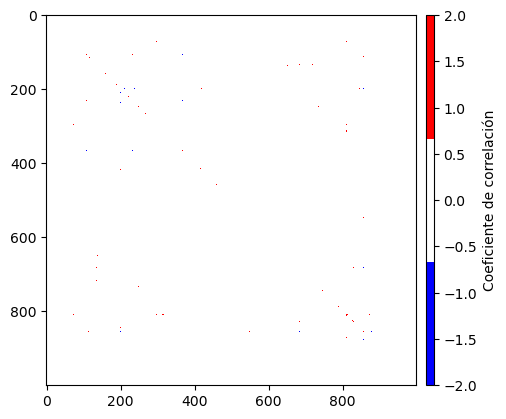

In [101]:
colors = ['blue', 'white', 'red']  # Colores para -2, 1, 2
cmap2 = ListedColormap(colors)

plot_heatmap(adyacencia, cantidad=1000, figsize=(5,5), cmap=cmap2)

### Trato de armar enlaces

In [119]:
adyacencia = pd.read_csv('../../Datos/transcriptomas/Matrices_javi/matriz_pearson_breeden_adyacencia-0.75.csv')
adyacencia = adyacencia.set_index('Proteina')

In [110]:
adyacencia_sin_diagonal = adyacencia.copy()
np.fill_diagonal(adyacencia_sin_diagonal.values, 0)
adyacencia_sin_diagonal

YAL001C  YAL002W  YAL003W  YAL004W  YAL005C  YAL007C  YAL008W  \
Proteina                                                                  
YAL001C       0.0      2.0      0.0      0.0      0.0      0.0      0.0   
YAL002W       2.0      0.0      0.0      0.0      0.0      0.0      0.0   
YAL003W       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YAL004W       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YAL005C       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...           ...      ...      ...      ...      ...      ...      ...   
YPR199C       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YPR200C       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YPR201W       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YPR202W       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
YPR203W       0.0      0.0      0.0      0.0      0.0      0.0      0.0   

          YAL009W  YAL010C  YAL011W  ...  YPR194C  YPR195C  YPR196W  YPR197C  \
Proteina                             ...                                       
YAL001C       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL002W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL003W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL004W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YAL005C       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
...           ...      ...      ...  ...      ...      ...      ...      ...   
YPR199C       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YPR200C       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YPR201W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YPR202W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
YPR203W       0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   

          YPR198W  YPR199C  YPR200C  YPR201W  YPR202W  YPR203W  
Proteina                                                        
YAL001C       0.0      0.0      0.0      0.0      0.0      0.0  
YAL002W       0.0      0.0      0.0      0.0      0.0      0.0  
YAL003W       0.0      0.0      0.0      0.0      0.0      0.0  
YAL004W       0.0      0.0      0.0      0.0      0.0      0.0  
YAL005C       0.0      0.0      0.0      0.0      0.0      0.0  
...           ...      ...      ...      ...      ...      ...  
YPR199C       0.0      0.0      0.0      0.0      0.0      0.0  
YPR200C       0.0      0.0      0.0      0.0      0.0      0.0  
YPR201W       0.0      0.0      0.0      0.0      0.0      0.0  
YPR202W       0.0      0.0      0.0      0.0      0.0      2.0  
YPR203W       0.0      0.0      0.0      0.0      2.0      0.0  

[6217 rows x 6217 columns]

In [111]:
def assign_edge_colors(G):
    edge_colors = {2: 'plum',
        -2: 'lightseagreen'}

    nx.set_edge_attributes(G, {e: edge_colors.get(G[e[0]][e[1]]['weight'], 'black') for e in G.edges()}, 'color')

In [112]:
cantidad2 = 500
prueba = adyacencia_sin_diagonal.copy().iloc[0:cantidad2, 0:cantidad2]
# prueba

In [113]:
## Dada mi matriz de adyacencia, puedo hacer un grafo con networkx donde cada nodo sea una proteina dada por el nombre de la columna y cada arista
## tenga un color segun el valor de la matriz de adyacencia, los enlaces que tengan un valor de 2 seran de color rojo, los que tengan un valor de -2 seran de color azul, si hay otro
## valor no existirá la arista

G = nx.from_pandas_adjacency(prueba)

# Asignar colores a las aristas
assign_edge_colors(G)

In [114]:
G.number_of_edges()

1925

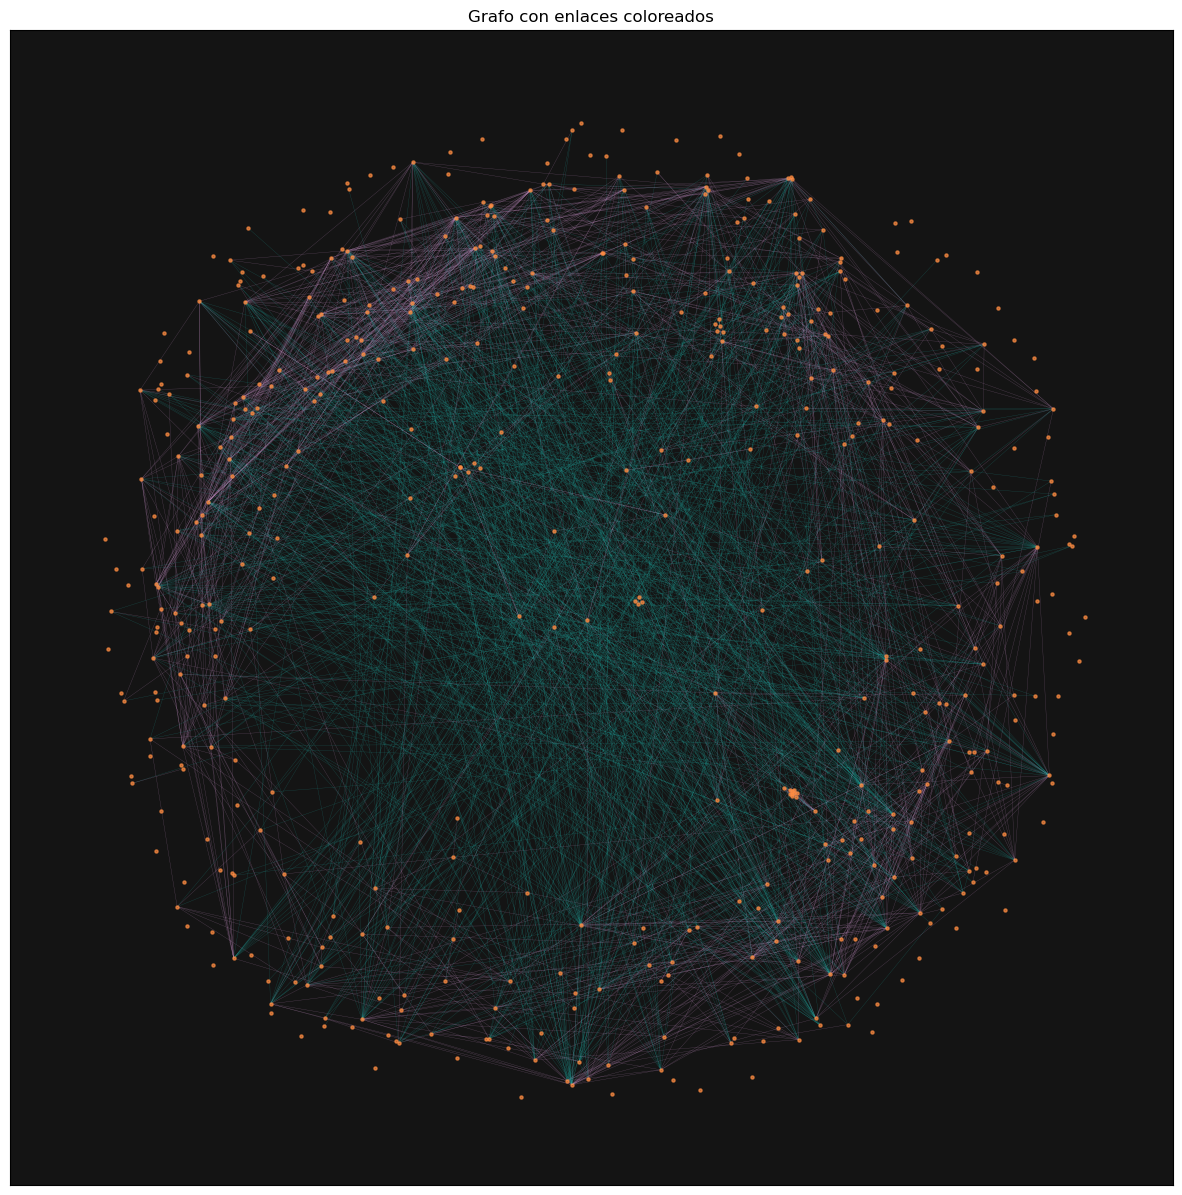

In [115]:
fig, ax = plt.subplots(1, 1, figsize = (15,15))

pos = nx.spring_layout(G, seed=42)  # Posiciones de los nodos
edge_colors = nx.get_edge_attributes(G, 'color').values()

# nx.draw(G, pos, with_labels=False, edge_color=list(edge_colors), node_size=5, node_color='k', alpha=0.7, width=0.2)

for i, ax in enumerate(fig.axes):
	ax.set_facecolor('#141414')  # Cambiar color de background
	nx.draw_networkx_nodes(G,
						   pos = pos,
						   node_color = '#FF8C42',
						   ax = ax,
						   node_size = 5, alpha = 0.7)
	
	nx.draw_networkx_edges(G, pos = pos, ax = ax, alpha = .4, edge_color = list(edge_colors), width = 0.2)

plt.title("Grafo con enlaces coloreados")
plt.show()

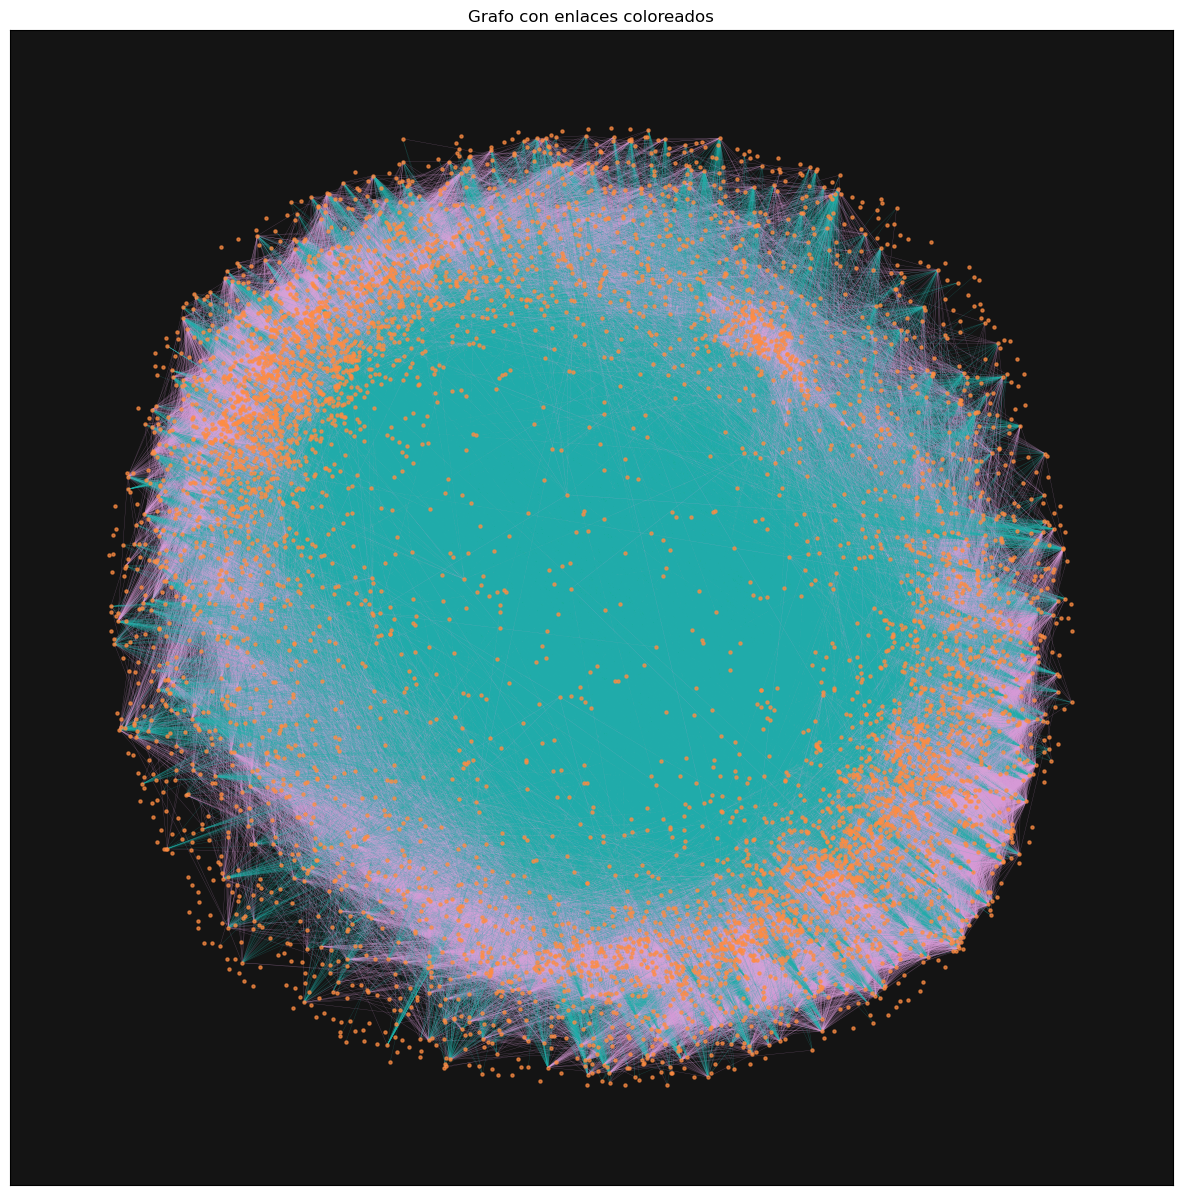

In [120]:
#Le doy a todo
G = nx.from_pandas_adjacency(adyacencia_sin_diagonal)

# Asignar colores a las aristas
assign_edge_colors(G)

fig, ax = plt.subplots(1, 1, figsize = (15,15))

pos = nx.spring_layout(G, seed=42)  # Posiciones de los nodos
edge_colors = nx.get_edge_attributes(G, 'color').values()

# nx.draw(G, pos, with_labels=False, edge_color=list(edge_colors), node_size=5, node_color='k', alpha=0.7, width=0.2)

for i, ax in enumerate(fig.axes):
	ax.set_facecolor('#141414')  # Cambiar color de background
	nx.draw_networkx_nodes(G,
						   pos = pos,
						   node_color = '#FF8C42',
						   ax = ax,
						   node_size = 5, alpha = 0.7)
	
	nx.draw_networkx_edges(G, pos = pos, ax = ax, alpha = .4, edge_color = list(edge_colors), width = 0.2)

plt.title("Grafo con enlaces coloreados")
plt.show()

In [121]:
G.number_of_edges()

277772